<a href="https://colab.research.google.com/github/pranshudiwan/NLP_CS_6200/blob/main/NLP_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disaster or not a disaster (tweets classification) using NLP
Project for NLP CS 6120

*Project by:* Hearan Won, Sindhu Somasundaram, Pranshu Diwan

##Introduction:

"Using NLP to predict if the tweet is a disaster or not"

1. Twitter is an important channel of communication during disasters
2. We wish to classify which tweets correspond to a disaster 
3. The problem is both classes have the same keyword, example ablaze
4. Metrics: We wish to minimize our false negatives, or aim for a higher recall (Type 2 error)




Example:

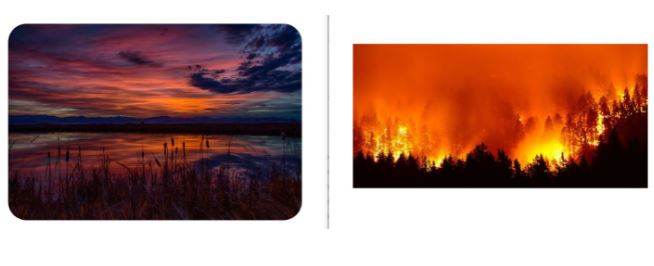

## Import Libraries

In [ ]:
#@title
# Import Libraries
import pandas as pd
import re, string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Importing data

In [ ]:
#@title
# Import train data
url_train = 'https://raw.githubusercontent.com/pranshudiwan/NLP_CS_6200/main/train.csv'
train = pd.read_csv(url_train)

# Import est data
url_test = 'https://raw.githubusercontent.com/pranshudiwan/NLP_CS_6200/main/test.csv'
test = pd.read_csv(url_test)

#### Training Data

In [ ]:
#@title
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#### Test Data

In [ ]:
#@title
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


#### Basic Information on Training Data

In [ ]:
#@title
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Thus we have some null values in keyword and location columns. 

A snippet of how our dataset looks like:


In [ ]:
#@title
train.sample(10)

,id,keyword,location,text,target
1433,2068,casualty,NaN,Another sad ocean casualty-Gray whale populati...,1
1485,2141,catastrophe,Azeroth,Chances are many of us are still digging out f...,1
350,502,army,NaN,17.Beyonce Is my pick for http://t.co/thoYhrHk...,0
4330,6150,hijack,Nigeria,Criminals Who Hijack Lorries And Buses Arreste...,1
2925,4204,drowned,"Alberta, VA",http://t.co/MoA0q0AuFa Jacksonville family ban...,0
277,404,apocalypse,"Elk Grove, CA, USA",Another hour! It's August 05 2015 at 08:02PM H...,1
681,983,blazing,"Intramuros, Manila",Come and join us Tomorrow!\nAugust 7 2015 at T...,0
2579,3697,destroy,Nigeria,@elgeotaofeeq that's not my take from his piec...,0
6468,9252,sunk,Bon Temps Louisiana,So if I capsize on your thighs high tide B-5 y...,0
3380,4842,evacuation,"Yellowknife, NT",UPDATE: The GNWT has just issued a voluntary e...,1


## Vizualizations


In [ ]:
#@title
# Data visualization imports
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

# importing images
from google.colab import files
from IPython.display import Image
from PIL import Image

# import image from local file
twitter_image = files.upload()



Saving twitter_mask2.png to twitter_mask2 (1).png


### Class Distribution

In [ ]:
#@title
disaster_tweets = train[train['target'] == 1].text
disaster_tweets = " ".join(line for line in disaster_tweets)

0    4342
1    3271
Name: target, dtype: int64 



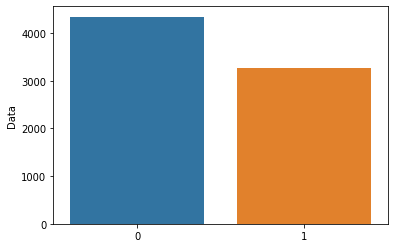

In [ ]:
#@title
# Class distribution
class_counts=train.target.value_counts()
sns.barplot(x=class_counts.index,y=class_counts)
plt.gca().set_ylabel('Data')

print(class_counts , "\n")

### Number of characters in disaster and non disaster tweets

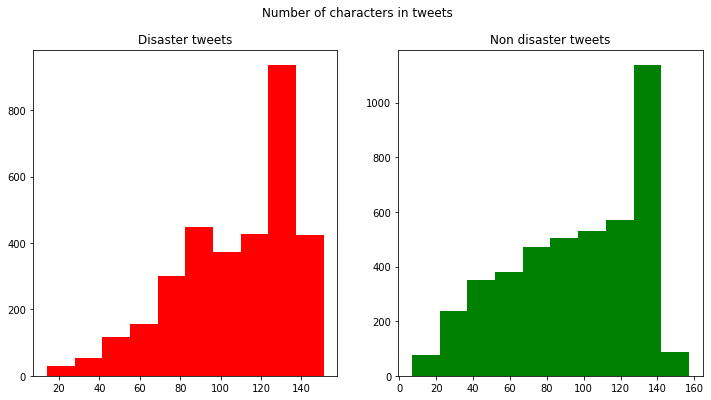

In [ ]:
#@title
#@title
# For Disaster tweets
disaster_tweet_len=train[train['target']==1]['text'].str.len()
#print(disaster_tweet_len)
non_disaster_tweet_len=train[train['target']==0]['text'].str.len()
#print(non_disaster_tweet_len)


# plotting
plot,(subplot1,subplot2)=plt.subplots(1,2,figsize=(12,6))
subplot1.hist(disaster_tweet_len,color='red')
subplot1.set_title('Disaster tweets')
subplot2.hist(non_disaster_tweet_len,color='green')
subplot2.set_title('Non disaster tweets')
plot.suptitle('Number of characters in tweets')
plt.show()

###Number of words in disaster and non disaster tweets

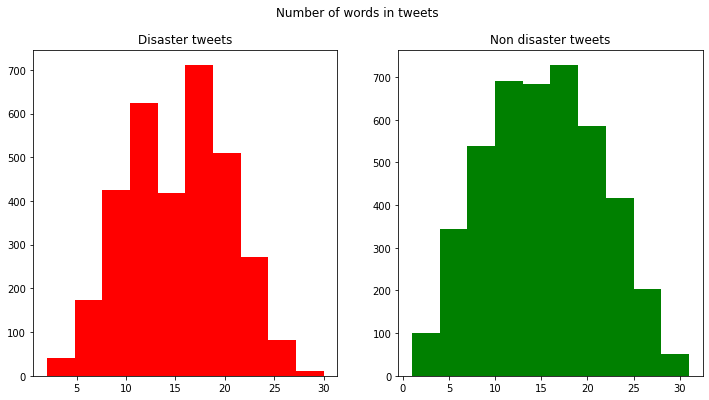

In [ ]:
#@title
#@title
# For Disaster tweets
disaster_no_of_words=train[train['target']==1]['text'].str.split().map(lambda tweet : len(tweet))
#print(disaster_no_of_words)
non_disaster_no_of_words=train[train['target']==0]['text'].str.split().map(lambda tweet : len(tweet))
#print(non_disaster_no_of_words)


# Plotting number of words
plot,(subplot1,subplot2)=plt.subplots(1,2,figsize=(12,6))
subplot1.hist(disaster_no_of_words,color='red')
subplot1.set_title('Disaster tweets')
subplot2.hist(non_disaster_no_of_words,color='green')
subplot2.set_title('Non disaster tweets')
plot.suptitle('Number of words in tweets')
plt.show()

###Average word length for disaster and non disaster words

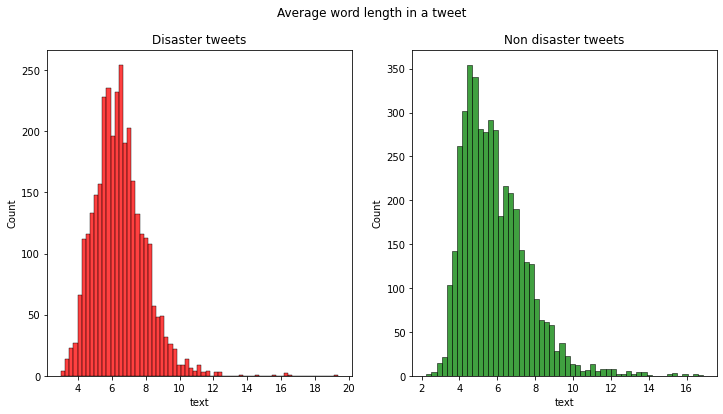

In [ ]:
#@title
#@title
# For Disaster tweets
disaster_word_len=train[train['target']==1]['text'].str.split().apply(lambda tweet : [len(word) for word in tweet])
# print(disaster_word_len)
#print('Average word length of disaster tweets', disaster_word_len.map(lambda word_len: np.mean(word_len)))
non_disaster_word_len=train[train['target']==0]['text'].str.split().apply(lambda tweet : [len(word) for word in tweet])
# print(non_disaster_word_len)
#print('Average word length of non disaster tweets', non_disaster_word_len.map(lambda word_len: np.mean(word_len)))

# Plotting number of words
plot,(subplot1,subplot2)=plt.subplots(1,2,figsize=(12,6))
sns.histplot(disaster_word_len.map(lambda word_len: np.mean(word_len)),ax=subplot1,color='red')
subplot1.set_title('Disaster tweets')

sns.histplot(non_disaster_word_len.map(lambda word_len: np.mean(word_len)),ax=subplot2,color='green')
subplot2.set_title('Non disaster tweets')
plot.suptitle('Average word length in a tweet')
plt.show()

## Why data cleaning is important

### Distribution of punctuations 

<BarContainer object of 18 artists>

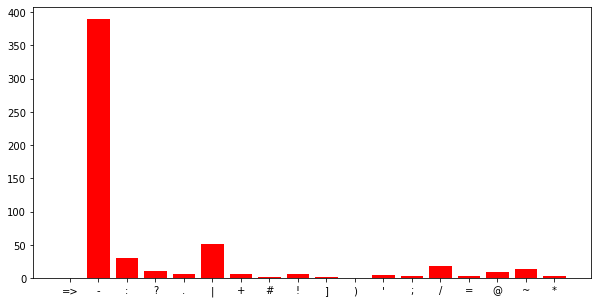

In [ ]:
#@title

from collections import defaultdict
def create_corpus(target):
    corpus=[]
    
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y, color='red')

### Word cloud (without data cleaning)

In [ ]:
#@title
#@title
twitter_mask = np.array(Image.open('twitter_mask2.png'))

# Function: plot_wordcloud
# Params: title (str) - title for the wordcloud,
#         text (str) - joined text to display
#         background_color (str) - "white", "black"
# Does: plots the wordcloud
def plot_wordcloud(title, text, background_color):
  stopwords = set(STOPWORDS)

  wordcloud = WordCloud(mask=twitter_mask, stopwords=stopwords, background_color=background_color,
                        width=1800, height=1400).generate(text)
  plt.figure(figsize=(20,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.tight_layout(pad=0)

  plt.title(title,
              fontdict={
                  'size': 20,
                  'verticalalignment': 'bottom'
              })
  plt.show()

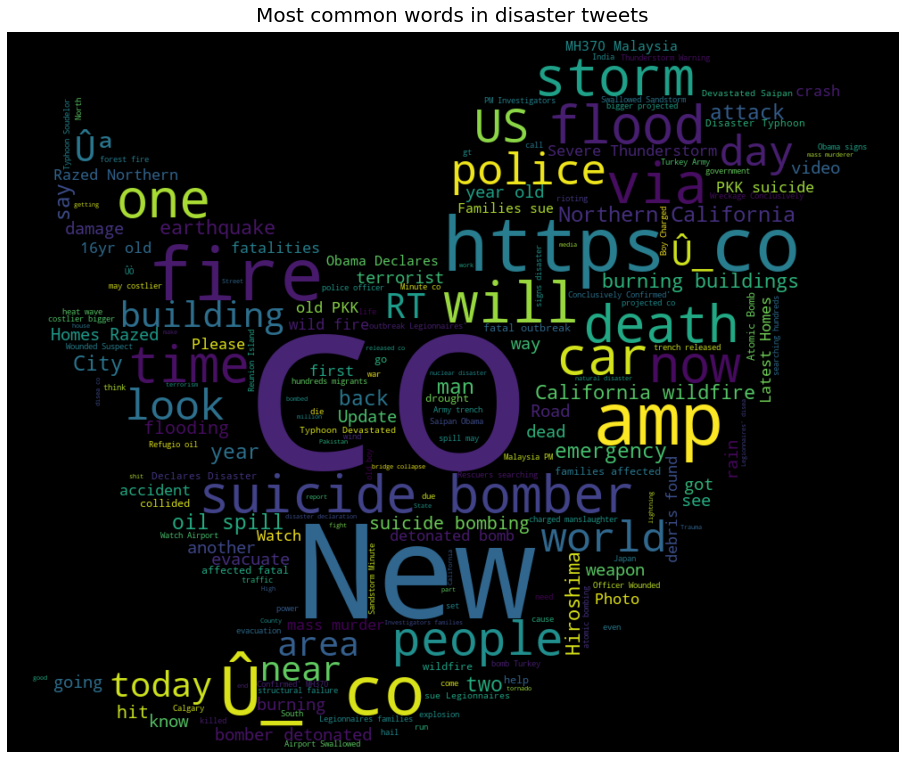

In [ ]:
#@title
#@title
plot_wordcloud("Most common words in disaster tweets", disaster_tweets, "black")

Messy data: 
  - most common words are web-link related words: CO, https
  - unwanted symbols, non alphabetic characters
  - mixed upper case and lower case (CO shown multiple times)
  
Additionally:
  - acronyms 
  - stopwords 

## Data Cleaning

### 1. Removing Punctuation

In [ ]:
#@title

train['text'] = train['text'].map(lambda x: re.sub(r'\W+', ' ', x))
#train['keyword'] = train['keyword'].map(lambda x: re.sub(r'\W+', ' ', x))
#train['location'] = train['location'].map(lambda x: re.sub(r'\W+', ' ', x))

In [ ]:
#@title
train.sample(5)

,id,keyword,location,text,target
6135,8753,siren,"Tampa, FL",A demoness with the voice of an angel Like a s...,0
3212,4608,emergency%20services,NaN,We re hiring Click to apply RN II EMERGENCY SE...,1
3990,5669,floods,Û¢III.XII.MMXIÛ¢,Granted like half my town floods when it rains...,1
2908,4176,drown,NaN,Some older Native Australians believe that the...,0
3272,4697,engulfed,NaN,Lucas Duda is Ghost Rider Not the Nic Cage ver...,1


### 2. Converting to lowercase

In [ ]:
#@title
#@title
train = train.apply(lambda x: x.astype(str).str.lower())

In [ ]:
#@title
#@title
train.sample(5)

,id,keyword,location,text,target
7011,10050,twister,instagram: bribriony,drunk twister is so hard,0
4811,6848,loud%20bang,nan,i don t laugh out loud at many things but man ...,0
4282,6085,hellfire,rheinbach / germany,orchid sign of the witch http t co ytkxwpyihg,0
6501,9294,survive,nan,lucypalladino and i don t have any classes to...,0
7001,10038,twister,nan,how many men would a human hew if a human cou...,0


### 3. Removing Emojis

In [ ]:
#@title
#@title
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

train['text']=train['text'].apply(lambda x: remove_emoji(x))
train.sample(5)

,id,keyword,location,text,target
1687,2435,collide,"maryland,baltimore",and even if the stars and moon collide ûó oh o...,0
5601,7991,razed,nairobi-kenya,george njenga the hero saved his burning frien...,1
577,835,bioterror,nan,jacksonville busines fedex stops shipping pote...,1
2782,4000,disaster,"usa, haiti, nepal",more natural disaster research urgent http t c...,1
824,1199,blizzard,nan,peanut butter cookie dough blizzard is,0


### 4. Correcting Spellings

In [ ]:
#@title
#@title
!pip install pyspellchecker

In [ ]:
#@title
#@title
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

#train['text']=train['text'].apply(lambda x : correct_spellings(x))
#train.sample(5)

#### An example sentence passed to our spell checker function

In [ ]:
#@title
#@title

text = 'corrrect me pleas. MY NLP preject is due tomrow'
correct_spellings(text)

'correct me please MY NLP project is due tomorow'

### 5. Replacing common acronyms

Some common acronyms:
1. idk - i don't know
2. ttyl - talk to you later

In [ ]:
#@title
#@title
## Replacing common acronyms

def other_clean(text):
        """
            Other manual text cleaning techniques
        """
        # Typos, slang and other
        sample_typos_slang = {
                                "w/e": "whatever",
                                "usagov": "usa government",
                                "recentlu": "recently",
                                "ph0tos": "photos",
                                "amirite": "am i right",
                                "exp0sed": "exposed",
                                "<3": "love",
                                "luv": "love",
                                "amageddon": "armageddon",
                                "trfc": "traffic",
                                "16yr": "16 year"
                                }

        # Acronyms
        sample_acronyms =  { 
                            "mh370": "malaysia airlines flight 370",
                            "okwx": "oklahoma city weather",
                            "arwx": "arkansas weather",    
                            "gawx": "georgia weather",  
                            "scwx": "south carolina weather",  
                            "cawx": "california weather",
                            "tnwx": "tennessee weather",
                            "azwx": "arizona weather",  
                            "alwx": "alabama weather",
                            "usnwsgov": "united states national weather service",
                            "2mw": "tomorrow"
                            }

        
        # Some common abbreviations 
        sample_abbr = {
                        "$" : " dollar ",
                        "€" : " euro ",
                        "4ao" : "for adults only",
                        "a.m" : "before midday",
                        "a3" : "anytime anywhere anyplace",
                        "aamof" : "as a matter of fact",
                        "acct" : "account",
                        "adih" : "another day in hell",
                        "afaic" : "as far as i am concerned",
                        "afaict" : "as far as i can tell",
                        "afaik" : "as far as i know",
                        "afair" : "as far as i remember",
                        "afk" : "away from keyboard",
                        "app" : "application",
                        "approx" : "approximately",
                        "apps" : "applications",
                        "asap" : "as soon as possible",
                        "asl" : "age, sex, location",
                        "atk" : "at the keyboard",
                        "ave." : "avenue",
                        "aymm" : "are you my mother",
                        "ayor" : "at your own risk", 
                        "b&b" : "bed and breakfast",
                        "b+b" : "bed and breakfast",
                        "b.c" : "before christ",
                        "b2b" : "business to business",
                        "b2c" : "business to customer",
                        "b4" : "before",
                        "b4n" : "bye for now",
                        "b@u" : "back at you",
                        "bae" : "before anyone else",
                        "bak" : "back at keyboard",
                        "bbbg" : "bye bye be good",
                        "bbc" : "british broadcasting corporation",
                        "bbias" : "be back in a second",
                        "bbl" : "be back later",
                        "bbs" : "be back soon",
                        "be4" : "before",
                        "bfn" : "bye for now",
                        "blvd" : "boulevard",
                        "bout" : "about",
                        "brb" : "be right back",
                        "bros" : "brothers",
                        "brt" : "be right there",
                        "bsaaw" : "big smile and a wink",
                        "btw" : "by the way",
                        "bwl" : "bursting with laughter",
                        "c/o" : "care of",
                        "cet" : "central european time",
                        "cf" : "compare",
                        "cia" : "central intelligence agency",
                        "csl" : "can not stop laughing",
                        "cu" : "see you",
                        "cul8r" : "see you later",
                        "cv" : "curriculum vitae",
                        "cwot" : "complete waste of time",
                        "cya" : "see you",
                        "cyt" : "see you tomorrow",
                        "dae" : "does anyone else",
                        "dbmib" : "do not bother me i am busy",
                        "diy" : "do it yourself",
                        "dm" : "direct message",
                        "dwh" : "during work hours",
                        "e123" : "easy as one two three",
                        "eet" : "eastern european time",
                        "eg" : "example",
                        "embm" : "early morning business meeting",
                        "encl" : "enclosed",
                        "encl." : "enclosed",
                        "etc" : "and so on",
                        "faq" : "frequently asked questions",
                        "fawc" : "for anyone who cares",
                        "fb" : "facebook",
                        "fc" : "fingers crossed",
                        "fig" : "figure",
                        "fimh" : "forever in my heart", 
                        "ft." : "feet",
                        "ft" : "featuring",
                        "ftl" : "for the loss",
                        "ftw" : "for the win",
                        "fwiw" : "for what it is worth",
                        "fyi" : "for your information",
                        "g9" : "genius",
                        "gahoy" : "get a hold of yourself",
                        "gal" : "get a life",
                        "gcse" : "general certificate of secondary education",
                        "gfn" : "gone for now",
                        "gg" : "good game",
                        "gl" : "good luck",
                        "glhf" : "good luck have fun",
                        "gmt" : "greenwich mean time",
                        "gmta" : "great minds think alike",
                        "gn" : "good night",
                        "g.o.a.t" : "greatest of all time",
                        "goat" : "greatest of all time",
                        "goi" : "get over it",
                        "gps" : "global positioning system",
                        "gr8" : "great",
                        "gratz" : "congratulations",
                        "gyal" : "girl",
                        "h&c" : "hot and cold",
                        "hp" : "horsepower",
                        "hr" : "hour",
                        "hrh" : "his royal highness",
                        "ht" : "height",
                        "ibrb" : "i will be right back",
                        "ic" : "i see",
                        "icq" : "i seek you",
                        "icymi" : "in case you missed it",
                        "idc" : "i do not care",
                        "idgadf" : "i do not give a damn fuck",
                        "idgaf" : "i do not give a fuck",
                        "idk" : "i do not know",
                        "ie" : "that is",
                        "i.e" : "that is",
                        "ifyp" : "i feel your pain",
                        "IG" : "instagram",
                        "iirc" : "if i remember correctly",
                        "ilu" : "i love you",
                        "ily" : "i love you",
                        "imho" : "in my humble opinion",
                        "imo" : "in my opinion",
                        "imu" : "i miss you",
                        "iow" : "in other words",
                        "irl" : "in real life",
                        "j4f" : "just for fun",
                        "jic" : "just in case",
                        "jk" : "just kidding",
                        "jsyk" : "just so you know",
                        "l8r" : "later",
                        "lb" : "pound",
                        "lbs" : "pounds",
                        "ldr" : "long distance relationship",
                        "lmao" : "laugh my ass off",
                        "lmfao" : "laugh my fucking ass off",
                        "lol" : "laughing out loud",
                        "ltd" : "limited",
                        "ltns" : "long time no see",
                        "m8" : "mate",
                        "mf" : "motherfucker",
                        "mfs" : "motherfuckers",
                        "mfw" : "my face when",
                        "mofo" : "motherfucker",
                        "mph" : "miles per hour",
                        "mr" : "mister",
                        "mrw" : "my reaction when",
                        "ms" : "miss",
                        "mte" : "my thoughts exactly",
                        "nagi" : "not a good idea",
                        "nbc" : "national broadcasting company",
                        "nbd" : "not big deal",
                        "nfs" : "not for sale",
                        "ngl" : "not going to lie",
                        "nhs" : "national health service",
                        "nrn" : "no reply necessary",
                        "nsfl" : "not safe for life",
                        "nsfw" : "not safe for work",
                        "nth" : "nice to have",
                        "nvr" : "never",
                        "nyc" : "new york city",
                        "oc" : "original content",
                        "og" : "original",
                        "ohp" : "overhead projector",
                        "oic" : "oh i see",
                        "omdb" : "over my dead body",
                        "omg" : "oh my god",
                        "omw" : "on my way",
                        "p.a" : "per annum",
                        "p.m" : "after midday",
                        "pm" : "prime minister",
                        "poc" : "people of color",
                        "pov" : "point of view",
                        "pp" : "pages",
                        "ppl" : "people",
                        "prw" : "parents are watching",
                        "ps" : "postscript",
                        "pt" : "point",
                        "ptb" : "please text back",
                        "pto" : "please turn over",
                        "qpsa" : "what happens", #"que pasa",
                        "ratchet" : "rude",
                        "rbtl" : "read between the lines",
                        "rlrt" : "real life retweet", 
                        "rofl" : "rolling on the floor laughing",
                        "roflol" : "rolling on the floor laughing out loud",
                        "rotflmao" : "rolling on the floor laughing my ass off",
                        "rt" : "retweet",
                        "ruok" : "are you ok",
                        "sfw" : "safe for work",
                        "sk8" : "skate",
                        "smh" : "shake my head",
                        "sq" : "square",
                        "srsly" : "seriously", 
                        "ssdd" : "same stuff different day",
                        "tbh" : "to be honest",
                        "tbs" : "tablespooful",
                        "tbsp" : "tablespooful",
                        "tfw" : "that feeling when",
                        "thks" : "thank you",
                        "tho" : "though",
                        "thx" : "thank you",
                        "tia" : "thanks in advance",
                        "til" : "today i learned",
                        "tl;dr" : "too long i did not read",
                        "tldr" : "too long i did not read",
                        "tmb" : "tweet me back",
                        "tntl" : "trying not to laugh",
                        "ttyl" : "talk to you later",
                        "u" : "you",
                        "u2" : "you too",
                        "u4e" : "yours for ever",
                        "utc" : "coordinated universal time",
                        "w/" : "with",
                        "w/o" : "without",
                        "w8" : "wait",
                        "wassup" : "what is up",
                        "wb" : "welcome back",
                        "wtf" : "what the fuck",
                        "wtg" : "way to go",
                        "wtpa" : "where the party at",
                        "wuf" : "where are you from",
                        "wuzup" : "what is up",
                        "wywh" : "wish you were here",
                        "yd" : "yard",
                        "ygtr" : "you got that right",
                        "ynk" : "you never know",
                        "zzz" : "sleeping bored and tired"
                        }
            
        sample_typos_slang_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_typos_slang.keys()) + r')(?!\w)')
        sample_acronyms_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_acronyms.keys()) + r')(?!\w)')
        sample_abbr_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')(?!\w)')
        
        text = sample_typos_slang_pattern.sub(lambda x: sample_typos_slang[x.group()], text)
        text = sample_acronyms_pattern.sub(lambda x: sample_acronyms[x.group()], text)
        text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)
        
        return text

In [ ]:
#@title
#@title
## !Need to change variable names and abbrevations as appropriate
train["text"] = train["text"].apply(lambda x: other_clean(x))
train.sample(5)

,id,keyword,location,text,target
772,1118,blew%20up,"brooklyn, ny",yahooschwab easy way to look good after the r...,0
4780,6801,loud%20bang,nan,actionmoviestaughtus things actually can expl...,0
4630,6580,injury,russia,our big baby climbed up on this thing on wheel...,0
6887,9873,traumatised,nan,the kids at the orphanage were obviously not ...,0
2299,3299,demolish,nyhc,if you think going to demolish drake s house o...,1


In [ ]:
#@title
#@title


### 6. Removing single and unwanted characters

In [ ]:
#@title
#@title
## Removing single characters
train["text"] = train["text"].str.replace(r'\b\w\b','').str.replace(r'\s+', ' ')

In [ ]:
#@title
#@title


### 7. Removing common stop-words and tokenizing the text

In [ ]:
#@title
#@title
from nltk.corpus import stopwords

stop = stopwords.words('english')
def tokenizer(text):
    tokenized = []
    for string in text:
        string = re.sub('[^a-z\sA-Z]', '', string)
        string = re.sub('http\S+', '', string)
        string = re.sub('co', '', string)
        string = re.sub('via', '', string)
        string = re.sub('amp', '', string)
        tokenized.append([w for w in string.split() if w not in stop])
    return tokenized

In [ ]:
#@title
#@title
train['tokenized'] = tokenizer(train["text"])

In [ ]:
#@title
#@title
train.sample(5)

,id,keyword,location,text,target,tokenized
2138,3070,deaths,planet earth,irony just died thousand deaths http co dbu30o...,0,"[irony, died, thousand, deaths, http, dbuobdxz]"
3807,5409,fire%20truck,nan,jacksonville fire amp rescue engine 58 awesome...,1,"[jacksonville, fire, rescue, engine, awesome, ..."
6212,8863,smoke,"dalston, hackney",pianohands you don know because you don smoke...,1,"[pianohands, know, smoke, way, make, taxis, bu..."
3933,5592,flood,new york,2pcs 18w cree led work light offroad lamp car ...,0,"[pcs, w, cree, led, work, light, offroad, l, c..."
4423,6294,hostage,nan,always tell my mom to bring me food or will h...,0,"[always, tell, mom, bring, food, hold, cat, ho..."


### 8. Performing stemming

In [ ]:
#@title
#@title
# Performing stemming

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
#@title
#@title
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#@title
#@title


In [ ]:
#@title
#@title
def stem(unstemmed_list):  
  ps = PorterStemmer()

  final_stemmed_list = []

  for i in range(len(unstemmed_list)):
    sentence = unstemmed_list[i]
    #print(sentence)
    words = word_tokenize(sentence)
    stemmed_list = []
    for w in words:
        stemmed_list.append(ps.stem(w))
    stemmed_list = ' '.join(stemmed_list)
    final_stemmed_list.append(stemmed_list)

  return final_stemmed_list


In [ ]:
#@title
#@title
unstemmed_list = train['text'].tolist()
train['stemmed_text'] = stem(unstemmed_list)

In [ ]:
#@title
#@title
#Removing digits
train['stemmed_text'] = train['stemmed_text'].str.replace('\d+', '')

In [ ]:
#@title
#@title
train.sample(5)

,id,keyword,location,text,target,tokenized,stemmed_text
4218,5991,hazardous,nan,http co 7aze4iogme risk assessment and optimiz...,0,"[http, azeiogme, risk, assessment, optimizatio...",http co azeiogm risk assess and optim for rout...
4168,5921,harm,kansas city,5hvzlaradio love what you picked we re playin...,0,"[hvzlaradio, love, picked, playing, worth, fif...",hvzlaradio love what you pick we re play worth...
6143,8762,siren,brizzle city !,tomarse99 they all are intending to go just w...,1,"[tomarse, intending, go, waiting, winds, drop,...",tomarse they all are intend to go just wait fo...
6294,8993,stretcher,nan,coach_keith44 hannomottola trpreston01 mlryda...,0,"[achkeith, hannomottola, trpreston, mlrydalch,...",coach_keith hannomottola trpreston mlrydalch n...
5567,7943,rainstorm,seattle,robot_rainstorm sort of interested in what fo...,0,"[robotrainstorm, sort, interested, fonts, using]",robot_rainstorm sort of interest in what font ...


In [ ]:
#@title
#@title


We are thus done with our data cleaning part here. We will continue to build models on the clean data

## Data Visualization

### 1. Word Cloud (after data cleaning)

In [ ]:
#@title
#@title
# all the cleaned disaster tweets 
disaster_list = train[train['target'] == '1'].tokenized
disaster_tweets = ""
for line in disaster_list:
  disaster_tweets += " ".join(token for token in line)

# all the unclean disaster tweets
non_disaster_list = train[train['target'] == '0'].tokenized
non_disaster_tweets = ""
for line in non_disaster_list:
  non_disaster_tweets += " ".join(token for token in line)


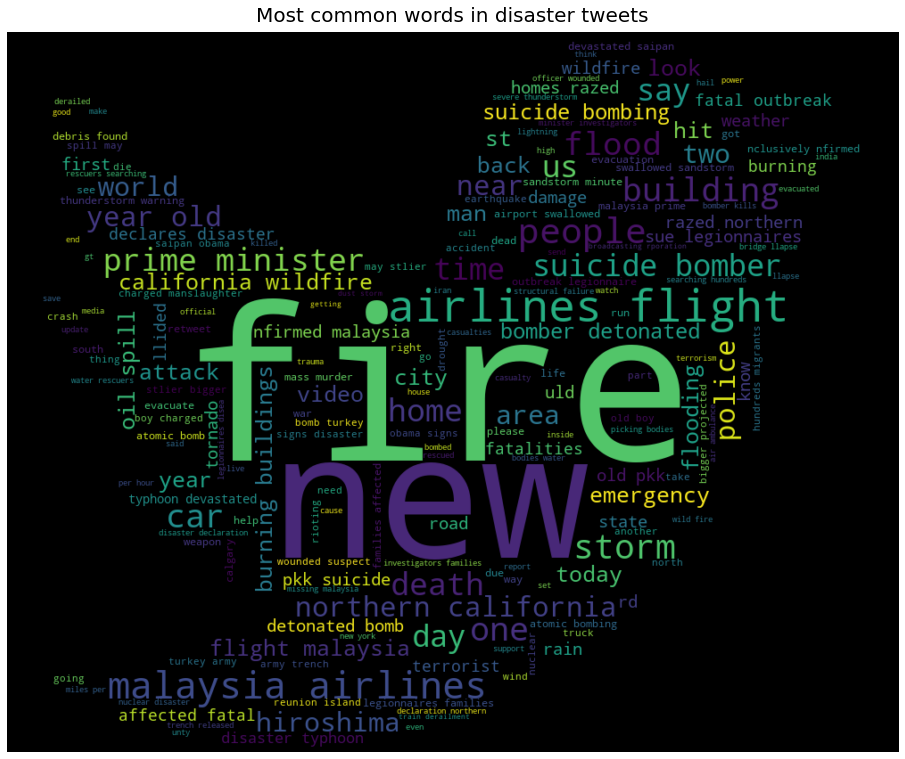

In [ ]:
#@title
plot_wordcloud("Most common words in disaster tweets", disaster_tweets, "black")

#### Disaster Tweets
- common disaster-related words:
  - Fire > airlines > flooding 
- Regional names
  - “Malaysia airlines”
  - “Northern california”
  - “Hiroshima”
- Organization / people
  - “Prime minister’
  - “Terrrorist”
- Strong confirmations
  - “Conclusively confirmed” 
  - “Declared disaster”


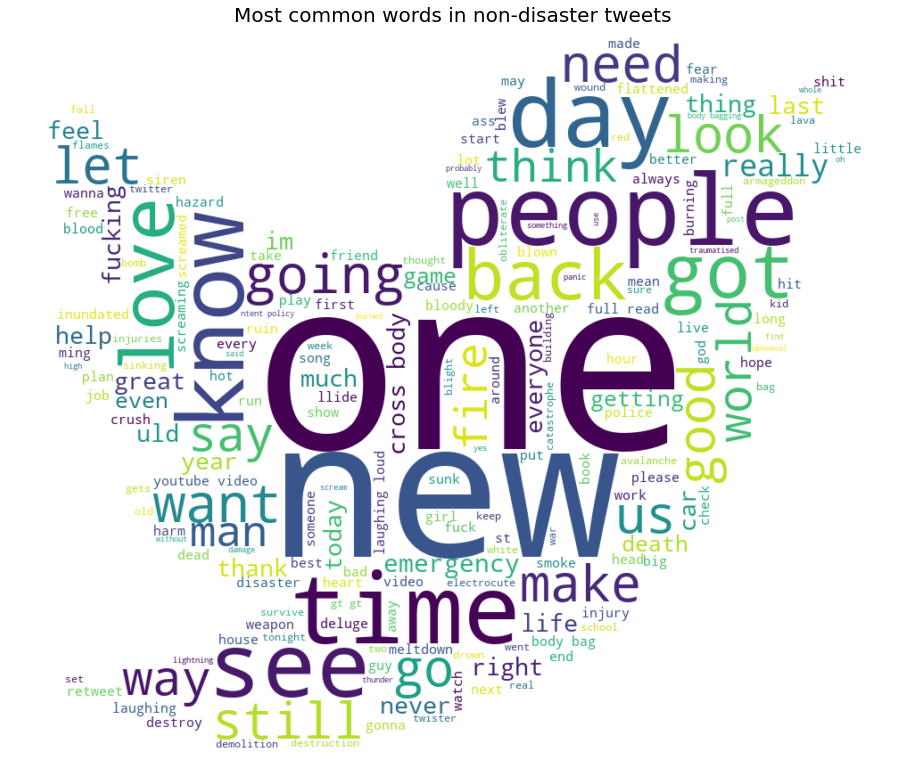

In [ ]:
#@title
plot_wordcloud("Most common words in non-disaster tweets", non_disaster_tweets, "white")


- Similar words (but less frequent)
 - “Death”
 - “fire”
- Interesting finds
 - “Quarantine offensive” 
 - “Bloody” and F-word
- More verbs, general terms
  - “Got”
  - “Love”
  - “think”


### 2. Tri-gram Bar plot

In [136]:
#@title
import nltk, re, string, collections
from nltk.util import ngrams

In [137]:
#@title
tokenized_list = train['tokenized']
tokenized_list = [item for sublist in tokenized_list for item in sublist]

In [138]:
#@title
esTrigrams = ngrams(tokenized_list, 3)

In [139]:
#@title
# get the frequency of each bigram in our corpus
esTrigramsFreq = collections.Counter(esTrigrams)

# what are the ten most popular ngrams in this Spanish corpus?
viz_data = esTrigramsFreq.most_common(10)

In [150]:
#@title
viz_data

x = []
y = []
for i in range(len(viz_data)):
  x.append(viz_data[i][0])
  y.append(viz_data[i][1])

In [149]:
#@title


In [151]:
#@title
x = [('malaysia airlines flight'),
 ('liked youtube video'),
 ('suicide bomber detonated'),
 ('nfirmed malaysia airlines'),
 ('northern california wildfire'),
 ('airlines flight malaysia'),
 ('latest homes razed'),
 ('homes razed northern'),
 ('pkk suicide bomber'),
 ('bomber detonated bomb')]

In [155]:
#@title
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=x, y=y)])


fig.update_layout(
    title="Tri-grams bar plot",
    xaxis_title="Frequently occuring trigrams",
    yaxis_title="Number of occurances"
    )

fig.show()

In [155]:
#@title


Presented all the data visualization tools. Moving on to model.

## Models

### 1. Word2Vec
- Transform text in train and test set into “average” embeddings
  - single embedding to describe each “tweet” 

- Use analysis tools to predict classification
  - Logistic regression
  - Linear SVC (support vector classification)
 


In [ ]:
#@title
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tqdm import tqdm 
import gensim
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

In [ ]:
#@title

# Function: evaluate pred
# params: expected (correct classification), real (prediction)
#         both should be 'list' type and 
#         elements should be string (so '1' not integer 1)
# Returns: dictionary of accuracy, precision, recall, and f1
# followed formulas here: https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
def evaluate_pred(expected, pred):
  # true positive (TP): expected = '1', pred = '1'
  # false negative (FN): expected = '1', pred = '0'
  # false positive (FP): expected = '0', pred = '1'
  # true negative (TN): expected = '0', pred = '0'
  TP = 0
  FN = 0
  FP = 0
  TN = 0

  if len(pred) != len(expected):
    print("The number of predictions are not equal to number of expected")
    assert 1 == 2

  for i in range(len(pred)):
    e = expected[i]
    p = pred[i]
    if e == '1':
      if p == '1':
        TP += 1
      else:
        FN += 1
    else:
      if p == '1':
        FP += 1
      else:
        TN += 1

  # accuracy = correct predictions over total (disaster tweets + non-disaster tweets)
  # Precision = correct disaster predictions / total predicted disaster tweets
  # Recall = correct disaster predictions / total actual disaster tweets 
  # F1 = harmonic mean of precision and recall 
  accuracy = (TP + TN) / len(pred)
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  F1 = 2 * (recall * precision) / (recall + precision)

  return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'F1': F1}


In [ ]:
#@title
# divide train data into train set and dev set
train['tokenized_stem'] = tokenizer(train["stemmed_text"])

val_set = train.iloc[:1500]
train_set = train.iloc[1500:]

val_x = list(val_set["tokenized_stem"])
val_y = list(val_set["target"])

train_x = list(train_set["tokenized_stem"])
train_y = list(train_set["target"])

In [ ]:
#@title
# word2vec model and vocab size
wv_model = gensim.models.word2vec.Word2Vec(train_x, size=300, window=7, min_count=1, sg=1, iter=40)
print("vocab size: ", len(wv_model.wv.vocab))

vocab size:  14917


Code for average embeddings

In [ ]:
#@title
# Function: get_average
# Params: model (word2vec model) and tokens_list (list of strings)
# Does: use average value of vectors to represent each tweet (document)
def get_average(model, tokens_list):
  vocabs = set(model.wv.vocab.keys())

  vec = []
  for word in tokens_list: 
    if word in vocabs:
      vec.append(model[word])
    else:
      vec.append(np.zeros(300))

  sum = np.sum(vec, axis = 0)
  return np.divide(sum, len(vec))

# Function: get embeddings
# Params: model (word2vec model), data (list of tokens list)
# Does: get embeddings (average weighed vector) for each tweet
def get_embeddings(model, data):
  embeddings = []
  for token_list in data:
    embeddings.append(get_average(model, token_list))
  return embeddings

In [ ]:
#@title
train_embeddings = get_embeddings(wv_model, train_x)
val_embeddings = get_embeddings(wv_model, val_x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


### Logistic Regression

In [ ]:
#@title
lr = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
lr.fit(train_embeddings, train_y)
word_lr_pred = lr.predict(val_embeddings)
evaluate_pred(val_y, word_lr_pred)

{'F1': 0.6332992849846782,
 'accuracy': 0.7606666666666667,
 'precision': 0.7380952380952381,
 'recall': 0.554561717352415}

### SVC modeling

In [ ]:
#@title
svc = SVC(random_state=1, C = 5, gamma = 6, kernel = 'linear', probability = True)
svc.fit(train_embeddings, train_y)

svc_pred = svc.predict(val_embeddings)
evaluate_pred(val_y, svc_pred)

{'F1': 0.6170442286947141,
 'accuracy': 0.7633333333333333,
 'precision': 0.7771739130434783,
 'recall': 0.5116279069767442}

### 2. Doc2Vec

- Doc2Vec modeling
- For each test tweet, find 5 most similar embeddings in train set
- Assign class based on majority (used 1000 vector size)
- Or use analysis tools to classify test set (used 200 vector size)
  - Logistic regression
  - Linear SVC


In [ ]:
#@title
#@title
tagged_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_x)]
model = Doc2Vec(tagged_docs, vector_size=200, dm = 0, window=7, min_count=1, epochs = 40)

train_vec = []
val_vec = []
for text in train_x:
  train_vec.append(model.infer_vector(text, steps = 20))

for text in val_x:
  val_vec.append(model.infer_vector(text, steps = 20))

In [ ]:
#@title
#@title
v = model.infer_vector("terrorist attack in london", steps = 100)
similar_vectors = model.docvecs.most_similar([v], topn = 5)


print("Similar vectors classification for text: terrorist attack in london\n")

for i, j in similar_vectors:
  print(train_y[i])

Similar vectors classification for text: terrorist attack in london

1
1
1
1
1


In [ ]:
#@title
#@title
v = model.infer_vector("saw this cute dog, dying of cuteness!", steps = 100)
sim_vectors = model.docvecs.most_similar([v], topn = 5)


print("Similar vectors classification for text: saw this cute dog, dying of cuteness!\n")

for i, j in sim_vectors:
  print(train_y[i])

Similar vectors classification for text: saw this cute dog, dying of cuteness!

0
0
0
1
0


In [ ]:
#@title
#@title
# Function: classify_doc2vec
# Params: train and test dataframe (each with "stemmed_text" and "target" column)
#         n - (odd integer) number of most similar vectors for classification
# Returns: classification of test dataset (list)
# Does: classify all the test tweets based on doc2vec modeling
#       finds n most similar documents from train dataset and classify based on majority
def classify_doc2vec(train, test, n):
  # prepare all the tokens and classifications fror modeling 
  test_x = list(tokenizer(test["stemmed_text"]))
  train_x = list(tokenizer(train["stemmed_text"]))
  train_y = list(train["target"])

  # tag the document and model (use devset to tune the params)
  # model - using distributed bag of words version
  # larger vectors give more accurate results (vector size = 1000, give 70% accuracy)
  tagged_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_x)]
  model = Doc2Vec(tagged_docs, vector_size=1000, dm = 0, window=7, min_count=1, epochs = 100)
  
  # get the most similar vectors for each text in testset and classify them by majority
  # ex. if 3/5 similar vectors were classified as disaster tweet, that tweet is a disaster tweets
  
  pred_y = []
  for text in tqdm(test_x):
    v = model.infer_vector(text, steps = 100)
    similar_vectors = model.docvecs.most_similar([v], topn = n)

    class_dic = {'1': 0, '0': 0} 
    for i, j in similar_vectors:
      pred = train_y[i]
      class_dic[pred] += 1 
    
    if (class_dic['1'] > class_dic['0']):
      pred_y.append('1')
    else:
      pred_y.append('0')

  return pred_y



Assigning class based on similar vector majority

In [ ]:
#@title
#@title
# changing numbers of topn didn't change accuracy that much
# greater vector size and epoch affected accuracy way more
# generally better with recall than precision 
pred = classify_doc2vec(train_set, val_set, 5)
evaluate_pred(list(val_set['target']), pred)

100%|██████████| 1500/1500 [00:17<00:00, 84.20it/s]


{'F1': 0.6135181975736569,
 'accuracy': 0.7026666666666667,
 'precision': 0.5949579831932773,
 'recall': 0.6332737030411449}

### SVC modeling 

In [ ]:
#@title
#@title
svc = SVC(random_state=1, C = 5, gamma = 6, kernel = 'linear', probability = True)
svc.fit(train_vec, train_y)

svc_pred = svc.predict(val_vec)

# better with precision, less accurate with recall (vector-200)
print("SVC modeling\n")
evaluate_pred(val_y, svc_pred)

SVC modeling



{'F1': 0.5677867902665122,
 'accuracy': 0.7513333333333333,
 'precision': 0.805921052631579,
 'recall': 0.43828264758497315}

### Logistic Regression

In [ ]:
#@title
#@title
# try logistic regression
lr.fit(train_vec, train_y)
lr_pred = lr.predict(val_vec)
evaluate_pred(val_y, lr_pred)

{'F1': 0.6370808678500987,
 'accuracy': 0.7546666666666667,
 'precision': 0.7098901098901099,
 'recall': 0.5778175313059034}

## Baseline LSTM with GloVe

- Glove has already vector representation of words (400,000 words)
- Embedding vectors for our data is constructed based on Glove words
- converting our data into sequences as it is a sequence to model vector
- no hidden layers
-Using Keras to implement the model

## LSTM with hidden layers
- Each hidden layer function is specialized to produce a defined output.
- Generally, 2 layers have shown to be enough to detect more complex features.
- We will add a dropout layer to avoid overfitting
- Using Keras to implement the model




## Some conclusions


## Questions?